## 1.Feature Engineering Overview

- User 特征
- Item 特征
- 场景特征
- 组合特征
- 特征工程

#### （1）User特征

- 用户标签、用户画像

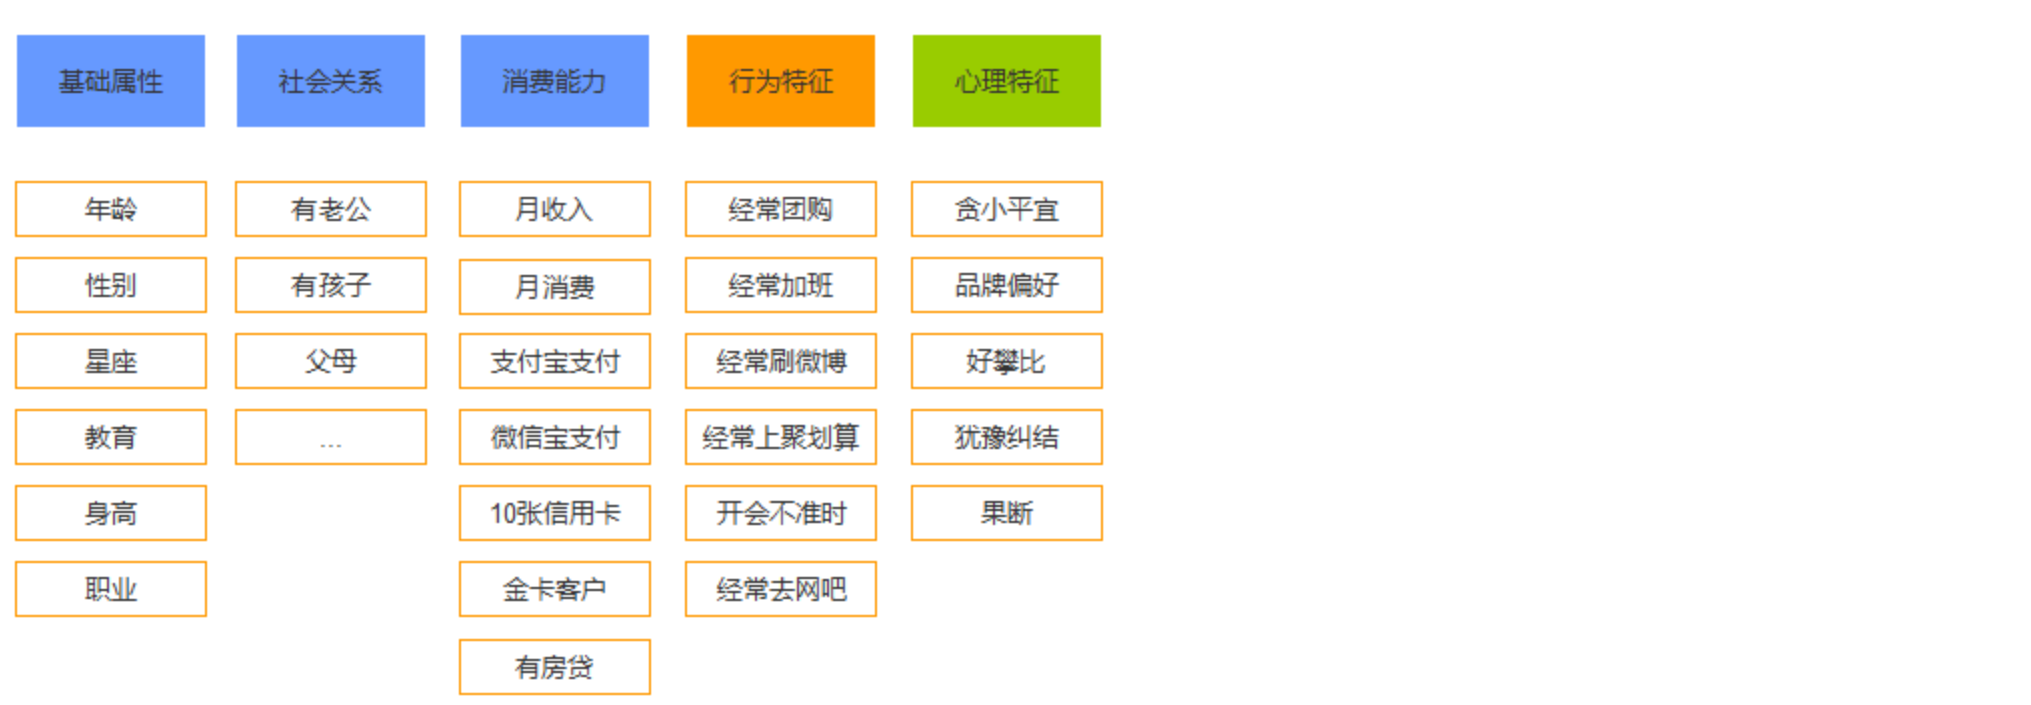

- 用户统计特征

- User Embedding




#### （2）Item 特征

- 属性
- 类别
- 统计特征
- Item Embedding

#### （3） 场景特征

- 上下文：包括不限于 网络、地域、时间、设备（手机型号/PC）等等

#### （4） 组合特征

- 用户和场景的组合
- 宝贝和场景的组合
- 等等等

#### （5） 特征工程

- 连续特征和离散特征
- Onehot
- Embedding



- 特征归一化
- missing values：直接填充、中位数填充等
- 特征选择：方差、相关系数、树模型等等
- 特征降维：PCA、SVD、LDA等等


- 特征连续化：空间变换、Embedding
- 特征离散化：截断分区间

#### （6）工业界处理特征的工具

- SQL
- MapReduce
- Hive/HBase


## 2. 本方法

#### 2.1 思路

（1）时间衰减：电商推荐，距离购买太远的数据很难应用，所以可以以一周内的数据做最后一天的推荐

（2）周期性：以一周为周期构造三组数据

预估目标12.19为周五，都以周五为目标预估，并删去包含双十二的一周

- part 1 - train: 11.22~11.27 -> 11.28;
- part 2 - val: 11.29~12.04 -> 12.05;
- part 3 - pred:  12.13~12.18 (-> 12.19);

其中 part 1 和 part 2 可作为模型训练和验证数据集，part 3 为测试数据集；

针对当前业务背景，考虑从user、item、item_category三大基本维度及其组合入手进行特征构建，简称U、I、C，忽略geohash的地理信息。

预估目标是0，1的二分类label问题。

（如果考虑所有的U-I组合去预估，数据量过大，所以只考虑一周内出现的U-I组合）

#### 2.2 具体



<table align="left">
<thead align="left">
<tr>
<th>特征名称</th>
<th>所属类别</th>
<th>特征含义</th>
<th>特征作用</th>
<th>特征数量</th>
</tr>
</thead>
<tbody align="left">
<tr>
<td>u_b_count_in_n（n=1/3/6）</td>
<td>U</td>
<td>用户在考察日前n天的行为总数计数</td>
<td>反映了user_id的活跃度（不同时间粒度：最近1天/3天/6天）</td>
<td>3</td>
</tr>
<tr>
<td>u_bi_count_in_n（i=1/2/3/4,n=1/3/6）</td>
<td>U</td>
<td>用户在考察日前n天的各项行为计数</td>
<td>反映了user_id的活跃度（不同时间粒度），反映了user_id的各项操作的活跃度，折射出user_id的购买习惯</td>
<td>12</td>
</tr>
<tr>
<td>u_b4_rate</td>
<td>U</td>
<td>用户的点击购买转化率</td>
<td>反映了用户的购买决策操作习惯</td>
<td>1</td>
</tr>
<tr>
<td>u_b4_diff_hours</td>
<td>U</td>
<td>用户的点击购买平均时差</td>
<td>反映了用户的购买决策时间习惯</td>
<td>1</td>
</tr>
<tr>
<td>i_u_count_in_n</td>
<td>I</td>
<td>商品在考察日前n天的用户总数计数</td>
<td>反映了item_id的热度（用户覆盖性）</td>
<td>3</td>
</tr>
<tr>
<td>i_b_count_in_n</td>
<td>I</td>
<td>商品在考察日前n天的行为总数计数</td>
<td>反映了item_id的热度（用户停留性）</td>
<td>3</td>
</tr>
<tr>
<td>i_bi_count_in_n</td>
<td>I</td>
<td>商品在考察日前n天的各项行为计数</td>
<td>反映了item_id的热度（用户操作吸引），折射出item_id产生的购买习惯特点</td>
<td>12</td>
</tr>
<tr>
<td>i_b4_rate</td>
<td>I</td>
<td>商品的点击购买转化率</td>
<td>反映了商品的购买决策操作特点</td>
<td>1</td>
</tr>
<tr>
<td>i_b4_diff_hours</td>
<td>I</td>
<td>商品的点击购买平均时差</td>
<td>反映了商品的购买决策时间特点</td>
<td>1</td>
</tr>
<tr>
<td>c_u_count_in_n</td>
<td>C</td>
<td>类别在考察日前n天的用户总数计数</td>
<td>反映了item_category的热度（用户覆盖性）</td>
<td>3</td>
</tr>
<tr>
<td>c_b_count_in_n</td>
<td>C</td>
<td>类别在考察日前n天的行为总数计数</td>
<td>反映了item_category的热度（用户停留性）</td>
<td>3</td>
</tr>
<tr>
<td>c_bi_count_in_n</td>
<td>C</td>
<td>类别在考察日前n天的各项行为计数</td>
<td>反映了item_category的热度（用户操作吸引），包含着item_category产生的购买习惯特点</td>
<td>12</td>
</tr>
<tr>
<td>c_b4_rate</td>
<td>C</td>
<td>类别的点击购买转化率</td>
<td>反映了item_category的购买决策操作特点</td>
<td>1</td>
</tr>
<tr>
<td>c_b4_diff_hours</td>
<td>C</td>
<td>类别的点击购买平均时差</td>
<td>反映了item_category的购买决策时间特点</td>
<td>1</td>
</tr>
<tr>
<td>ic_u_rank_in_c</td>
<td>IC</td>
<td>商品在所属类别中的用户人数排序</td>
<td>反映了item_id在item_category中的热度排名（用户覆盖性）</td>
<td>1</td>
</tr>
<tr>
<td>ic_b_rank_in_c</td>
<td>IC</td>
<td>商品在所属类别中的行为总数排序</td>
<td>反映了item_id在item_category中的热度排名（用户停留性）</td>
<td>1</td>
</tr>
<tr>
<td>ic_b4_rank_in_c</td>
<td>IC</td>
<td>商品在所属类别中的销量排序</td>
<td>反映了item_id在item_category中的热度排名（销量）</td>
<td>1</td>
</tr>
<tr>
<td>ui_b_count_in_n</td>
<td>UI</td>
<td>用户-商品对在考察日前n天的行为总数计数</td>
<td>反映了user_id - item_id的活跃度</td>
<td>3</td>
</tr>
<tr>
<td>ui_bi_count_in_n</td>
<td>UI</td>
<td>用户-商品对在考察日前n天的各项行为计数</td>
<td>反映了user_id - item_id的活跃度，反映了user_id - item_id的各项操作的活跃度，对应着user_id - item_id的购买习惯</td>
<td>12</td>
</tr>
<tr>
<td>ui_bi_last_hours</td>
<td>UI</td>
<td>用户-商品对各项行为上一次发生距考察日的时差</td>
<td>反映了user_id - item_id的活跃时间特征</td>
<td>4</td>
</tr>
<tr>
<td>ui_b_count_rank_in_n_in_u</td>
<td>UI</td>
<td>用户商品对的行为在用户所有商品中的排序</td>
<td>反映了user_id对item_id的行为偏好</td>
<td>3</td>
</tr>
<tr>
<td>ui_b_count_rank_in_n_in_uc</td>
<td>UI-UC</td>
<td>用户-商品对的行为在用户-类别对中的排序</td>
<td>反映了user_id对item_category中的各个item_id的行为偏好</td>
<td>3</td>
</tr>
<tr>
<td>uc_b_count_in_n</td>
<td>UC</td>
<td>用户-类别对在考察日前n天的行为总数计数</td>
<td>反映了user_id - item_category的活跃度</td>
<td>3</td>
</tr>
<tr>
<td>uc_bi_count_in_n</td>
<td>UC</td>
<td>用户-类别对在考察日前n天的各项行为计数</td>
<td>反映了user_id -item_category的活跃度，反映了user_id -item_category的各项操作的活跃度，对应着user_id -item_category的购买习惯</td>
<td>12</td>
</tr>
<tr>
<td>uc_bi_last_hours</td>
<td>UC</td>
<td>用户-类别对各项行为上一次发生距考察日的时差</td>
<td>反映了user_id -item_category的活跃时间特征</td>
<td>4</td>
</tr>
<tr>
<td>uc_b_count_rank_in_n_in_u</td>
<td>UC</td>
<td>用户-类别对的行为在用户所有商品中的排序</td>
<td>反映了user_id对item_category的行为偏好</td>
<td>3</td>
</tr>
</tbody>
</table>

## 3.实现

In [ ]:
%run feature_construct\divide_data_set.py

In [ ]:
%run feature_construct\feature_construct_part_1.py

In [ ]:
%run feature_construct\feature_construct_part_2.py

In [ ]:
%run feature_construct\feature_construct_part_3.py

# Feature Engineering

In [7]:
### file path
# input
path_df_D = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/tianchi_fresh_comp_train_user.csv'

# output
path_df_part_1 = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_1.csv'
path_df_part_2 = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_2.csv'
path_df_part_3 = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_3.csv'

path_df_part_1_tar = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_1_tar.csv'
path_df_part_2_tar = '/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_2_tar.csv'

path_df_part_1_uic_label = "/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_1_uic_label.csv"
path_df_part_2_uic_label = "/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_2_uic_label.csv"
path_df_part_3_uic       = "/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/df_part_3_uic.csv"
#########################################
'''
step1: divide the data set to 3 part
    part 1 - train: 11.22 ~ 11.27 --> 11.28
    part 2- train: 11.29 ~ 12.04 --> 12.05
    skip 12.12 week due to the peak sale
    part 3 - test: 12.13 ~ 12.18 --> 12.19

'''

'\nstep1: divide the data set to 3 part\n    part 1 - train: 11.22 ~ 11.27 --> 11.28\n    part 2- train: 11.29 ~ 12.04 --> 12.05\n    skip 12.12 week due to the peak sale\n    part 3 - test: 12.13 ~ 12.18 --> 12.19\n\n'

In [3]:
# data set operation based pandas
import pandas as pd

batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv(open(path_df_D, 'r'), 
                      parse_dates=['time'], 
                      index_col = ['time'], 
                      date_parser = dateparse,
                      chunksize = 100000):  # operation on chunk as the data file is too large
    try:
        df_part_1     = df.loc['2014-11-22':'2014-11-27']
        df_part_1_tar = df.loc['2014-11-28']
        df_part_2     = df.loc['2014-11-29':'2014-12-04']
        df_part_2_tar = df.loc['2014-12-05']
        df_part_3     = df.loc['2014-12-13':'2014-12-18']

        df_part_1.to_csv(path_df_part_1,  
                         columns=['user_id','item_id','behavior_type','item_category'],
                         header=False, mode='a')        
        df_part_1_tar.to_csv(path_df_part_1_tar,
                         columns=['user_id','item_id','behavior_type','item_category'],
                         header=False, mode='a')
        df_part_2.to_csv(path_df_part_2,  
                         columns=['user_id','item_id','behavior_type','item_category'],
                         header=False, mode='a')  
        df_part_2_tar.to_csv(path_df_part_2_tar,
                         columns=['user_id','item_id','behavior_type','item_category'],
                         header=False, mode='a')   
        df_part_3.to_csv(path_df_part_3,  
                         columns=['user_id','item_id','behavior_type','item_category'],
                         header=False, mode='a')
        
        batch += 1
        print('chunk %d done.' %batch) 
        
    except StopIteration:
        print("divide the data set finish.")
        break 

/var/folders/gy/vmc0g_m96tvb6cdgrbz7478r0000gn/T/ipykernel_15173/3429634917.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')


chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

/var/folders/gy/vmc0g_m96tvb6cdgrbz7478r0000gn/T/ipykernel_15173/3429634917.py:14: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_part_2     = df.loc['2014-11-29':'2014-12-04']


chunk 198 done.
chunk 199 done.
chunk 200 done.
chunk 201 done.
chunk 202 done.
chunk 203 done.
chunk 204 done.
chunk 205 done.
chunk 206 done.
chunk 207 done.
chunk 208 done.
chunk 209 done.
chunk 210 done.
chunk 211 done.
chunk 212 done.
chunk 213 done.
chunk 214 done.
chunk 215 done.
chunk 216 done.
chunk 217 done.
chunk 218 done.
chunk 219 done.
chunk 220 done.
chunk 221 done.
chunk 222 done.
chunk 223 done.
chunk 224 done.
chunk 225 done.
chunk 226 done.
chunk 227 done.
chunk 228 done.
chunk 229 done.
chunk 230 done.
chunk 231 done.
chunk 232 done.
chunk 233 done.


In [8]:
########################################################################
'''Step 2 construct U-I-C_label of df_part 1 & 2
                    U-I-C of df_part 3      
'''

##### part_1 #####
# uic
data_file = open(path_df_part_1, 'r')
try:
    df_part_1 = pd.read_csv(data_file, index_col = False)
    df_part_1.columns = ['time','user_id','item_id','behavior_type','item_category']
finally:
    data_file.close()
df_part_1_uic = df_part_1.drop_duplicates(['user_id', 'item_id', 'item_category'])[['user_id', 'item_id', 'item_category']]

data_file = open(path_df_part_1_tar, 'r')
try:
    df_part_1_tar = pd.read_csv(data_file, index_col = False, parse_dates = [0])
    df_part_1_tar.columns = ['time','user_id','item_id','behavior_type','item_category']
finally:
    data_file.close()
    
# uic + label 
df_part_1_uic_label_1 = df_part_1_tar[df_part_1_tar['behavior_type'] == 4][['user_id','item_id','item_category']]
df_part_1_uic_label_1.drop_duplicates(['user_id','item_id'],'last', inplace=True)
df_part_1_uic_label_1['label'] = 1
df_part_1_uic_label = pd.merge(df_part_1_uic, 
                               df_part_1_uic_label_1,
                               on=['user_id','item_id','item_category'], 
                               how='left').fillna(0).astype('int')
df_part_1_uic_label.to_csv(path_df_part_1_uic_label, index=False)

/var/folders/gy/vmc0g_m96tvb6cdgrbz7478r0000gn/T/ipykernel_15173/3151589332.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only
  df_part_1_uic_label_1.drop_duplicates(['user_id','item_id'],'last', inplace=True)


In [9]:
##### part_2 #####
# uic
data_file = open(path_df_part_2, 'r')
try:
    df_part_2 = pd.read_csv(data_file, index_col = False)
    df_part_2.columns = ['time','user_id','item_id','behavior_type','item_category']
finally:
    data_file.close()
df_part_2_uic = df_part_2.drop_duplicates(['user_id', 'item_id', 'item_category'])[['user_id', 'item_id', 'item_category']]

data_file = open(path_df_part_2_tar, 'r')
try:
    df_part_2_tar = pd.read_csv(data_file, index_col = False, parse_dates = [0])
    df_part_2_tar.columns = ['time','user_id','item_id','behavior_type','item_category']
finally:
    data_file.close()

# uic + label 
df_part_2_uic_label_1 = df_part_2_tar[df_part_2_tar['behavior_type'] == 4][['user_id','item_id','item_category']]
df_part_2_uic_label_1.drop_duplicates(['user_id','item_id'],'last', inplace=True)
df_part_2_uic_label_1['label'] = 1
df_part_2_uic_label = pd.merge(df_part_2_uic, 
                               df_part_2_uic_label_1,
                               on=['user_id','item_id','item_category'], 
                               how='left').fillna(0).astype('int')
df_part_2_uic_label.to_csv(path_df_part_2_uic_label, index=False)

/var/folders/gy/vmc0g_m96tvb6cdgrbz7478r0000gn/T/ipykernel_15173/2079736572.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only
  df_part_2_uic_label_1.drop_duplicates(['user_id','item_id'],'last', inplace=True)


In [12]:
##### part_3 #####
# uic 
data_file = open(path_df_part_3, 'r')
try:
    df_part_3 = pd.read_csv(data_file, index_col = False)
    df_part_3.columns = ['time','user_id','item_id','behavior_type','item_category']
finally:
    data_file.close()
df_part_3_uic = df_part_3.drop_duplicates(['user_id', 'item_id', 'item_category'])[['user_id', 'item_id', 'item_category']]
df_part_3_uic.to_csv(path_df_part_3_uic, index=False)


print(' all done ')

 all done 
